Importing files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First 5 Rows

In [5]:
df = pd.read_csv("winequalityN.csv")
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

Shape of data

In [4]:
print(df.shape)

(6497, 13)


Information about the DataSet

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


Mathematical description of data

In [6]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [7]:
print(df.columns.tolist())

['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [8]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
df.nunique()

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
dtype: int64

Quality vs Count

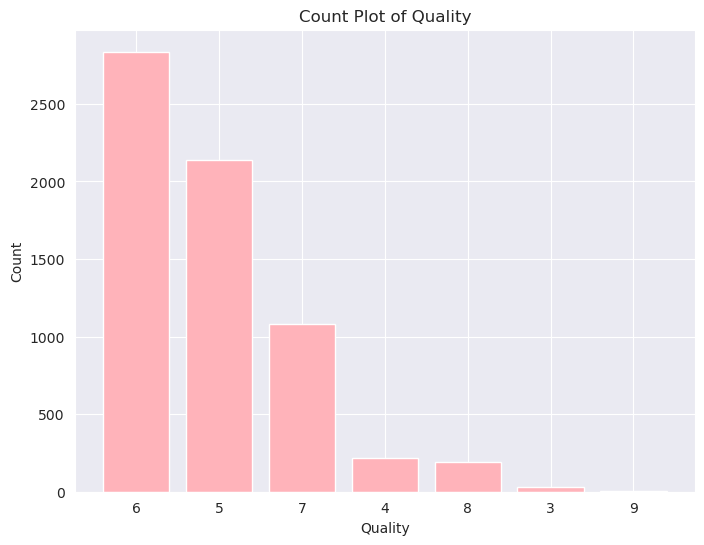

In [33]:

quality_counts = df['quality'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts,color="#FFB3BA")
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


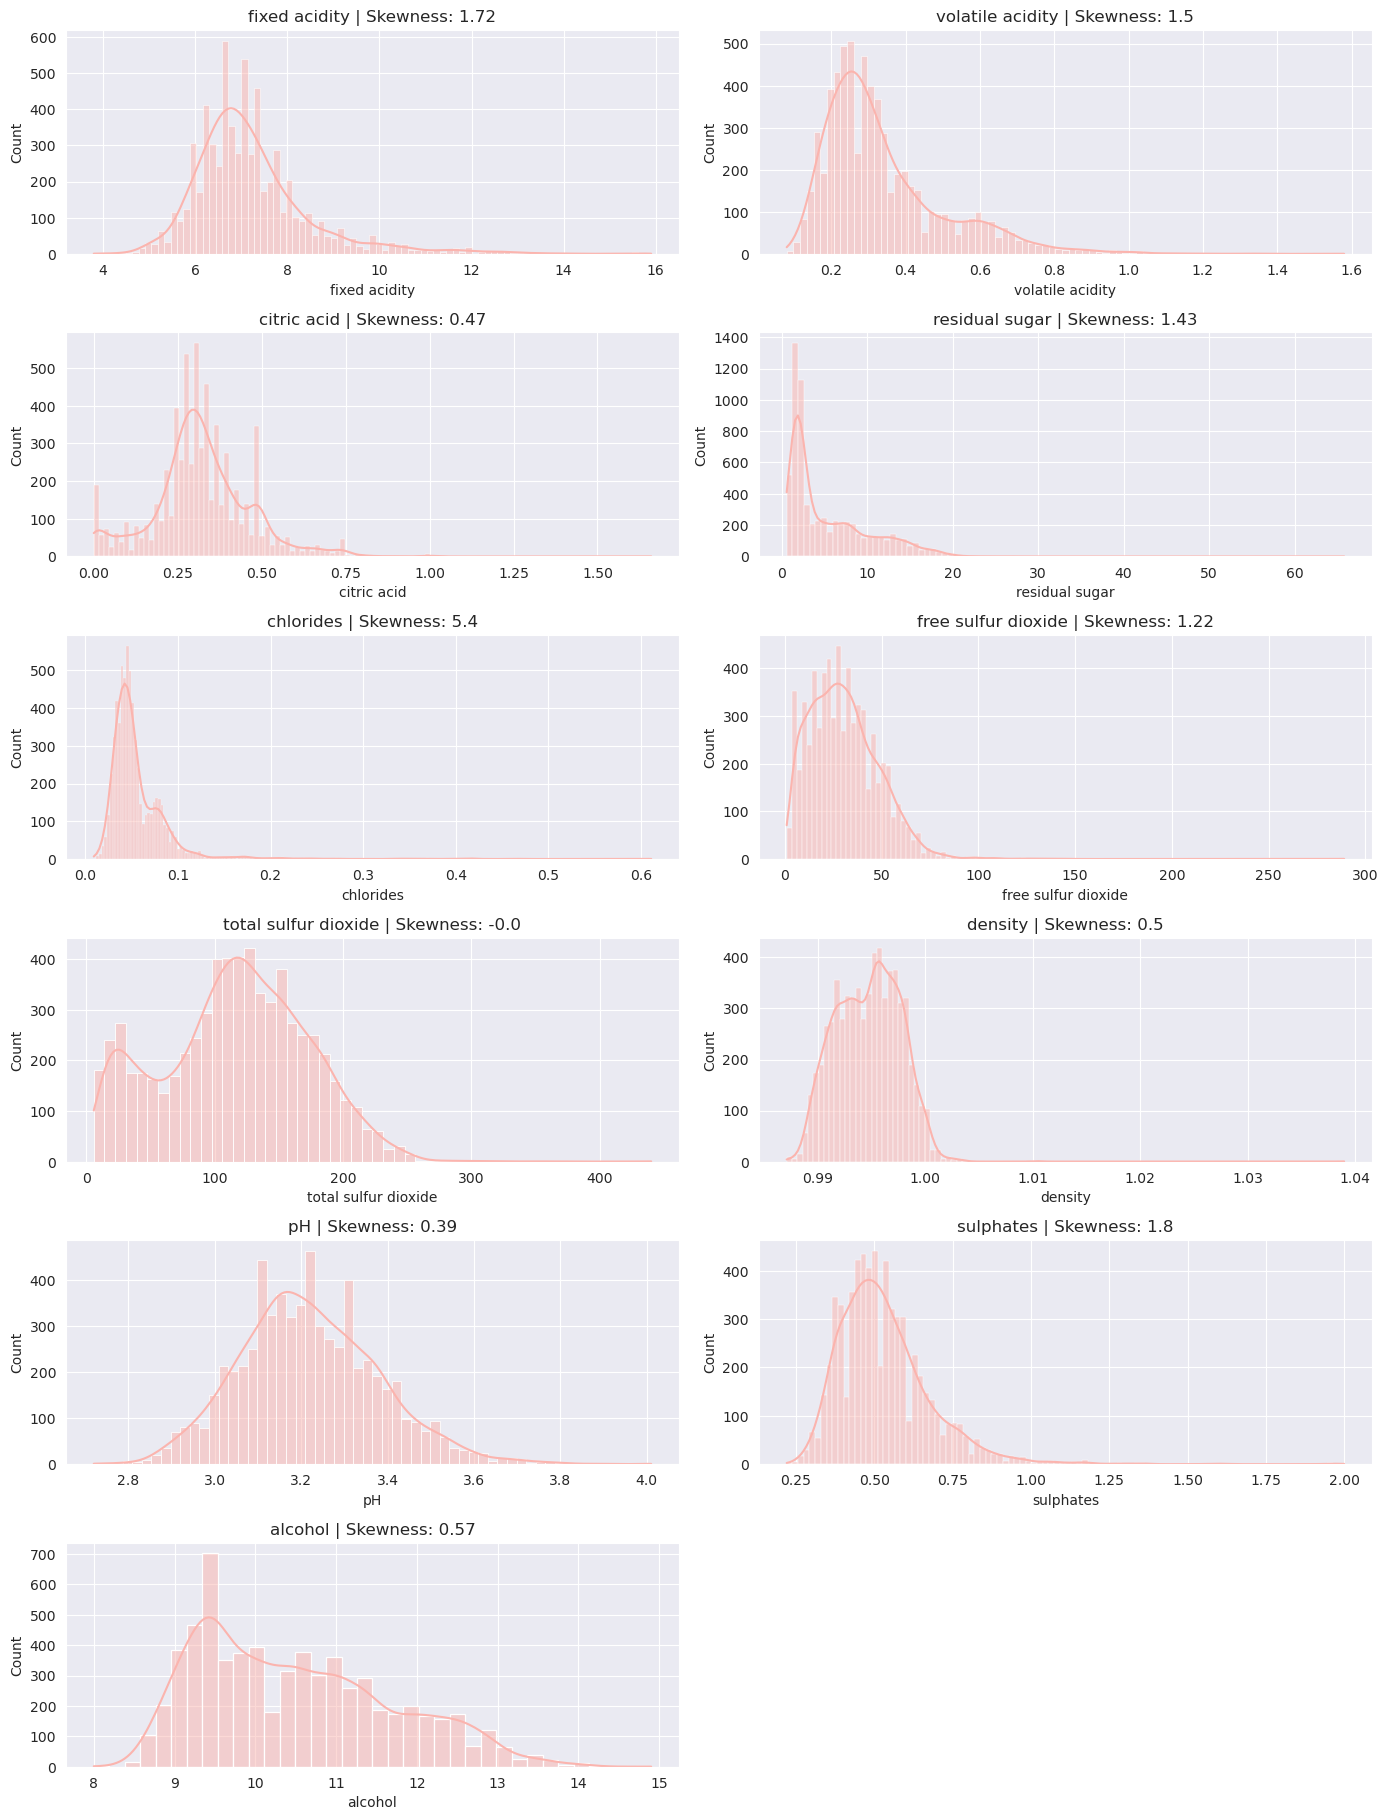

In [31]:
sns.set_style("darkgrid")
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
plt.tight_layout()
plt.show()


/tmp/ipykernel_962/3235474979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="quality", y="alcohol", data=df, palette='viridis')
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 78.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


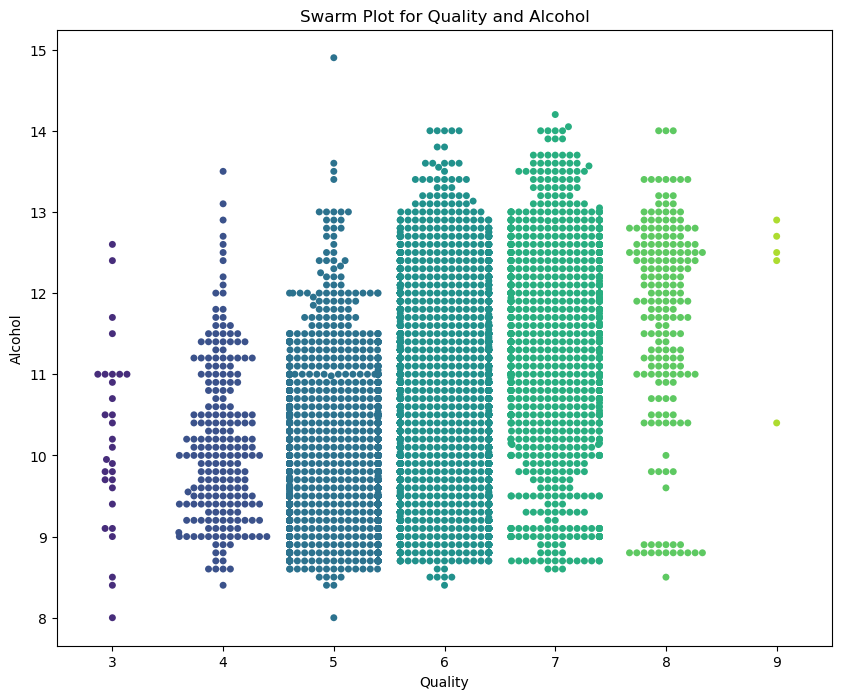

In [6]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x="quality", y="alcohol", data=df, palette='viridis')
plt.title('Swarm Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

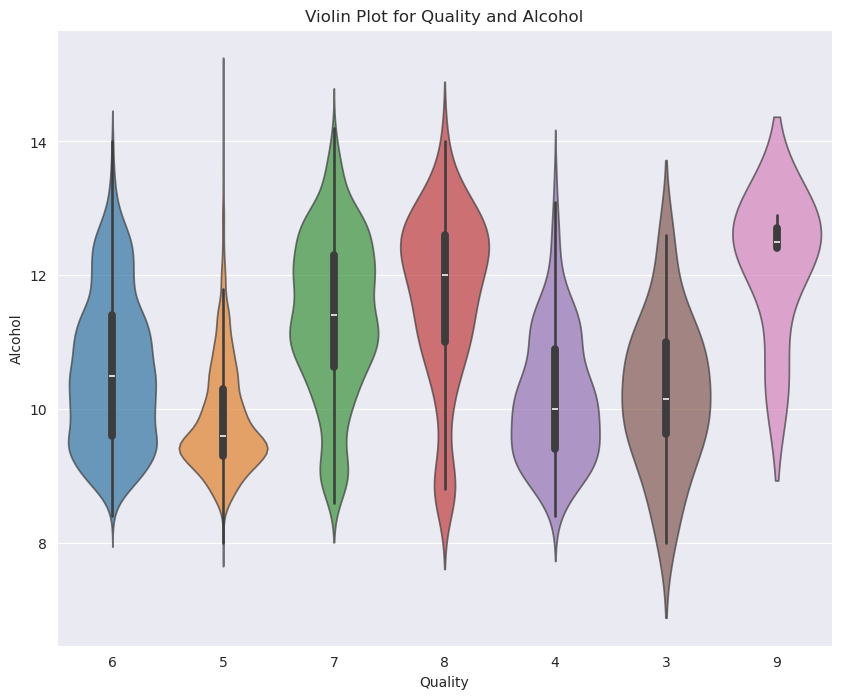

In [12]:
df['quality'] = df['quality'].astype(str)
plt.figure(figsize=(10, 8))
sns.violinplot(x="quality", y="alcohol", data=df, hue="quality", legend=False, alpha=0.7)
plt.title('Violin Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()


<Figure size 1000x600 with 0 Axes>

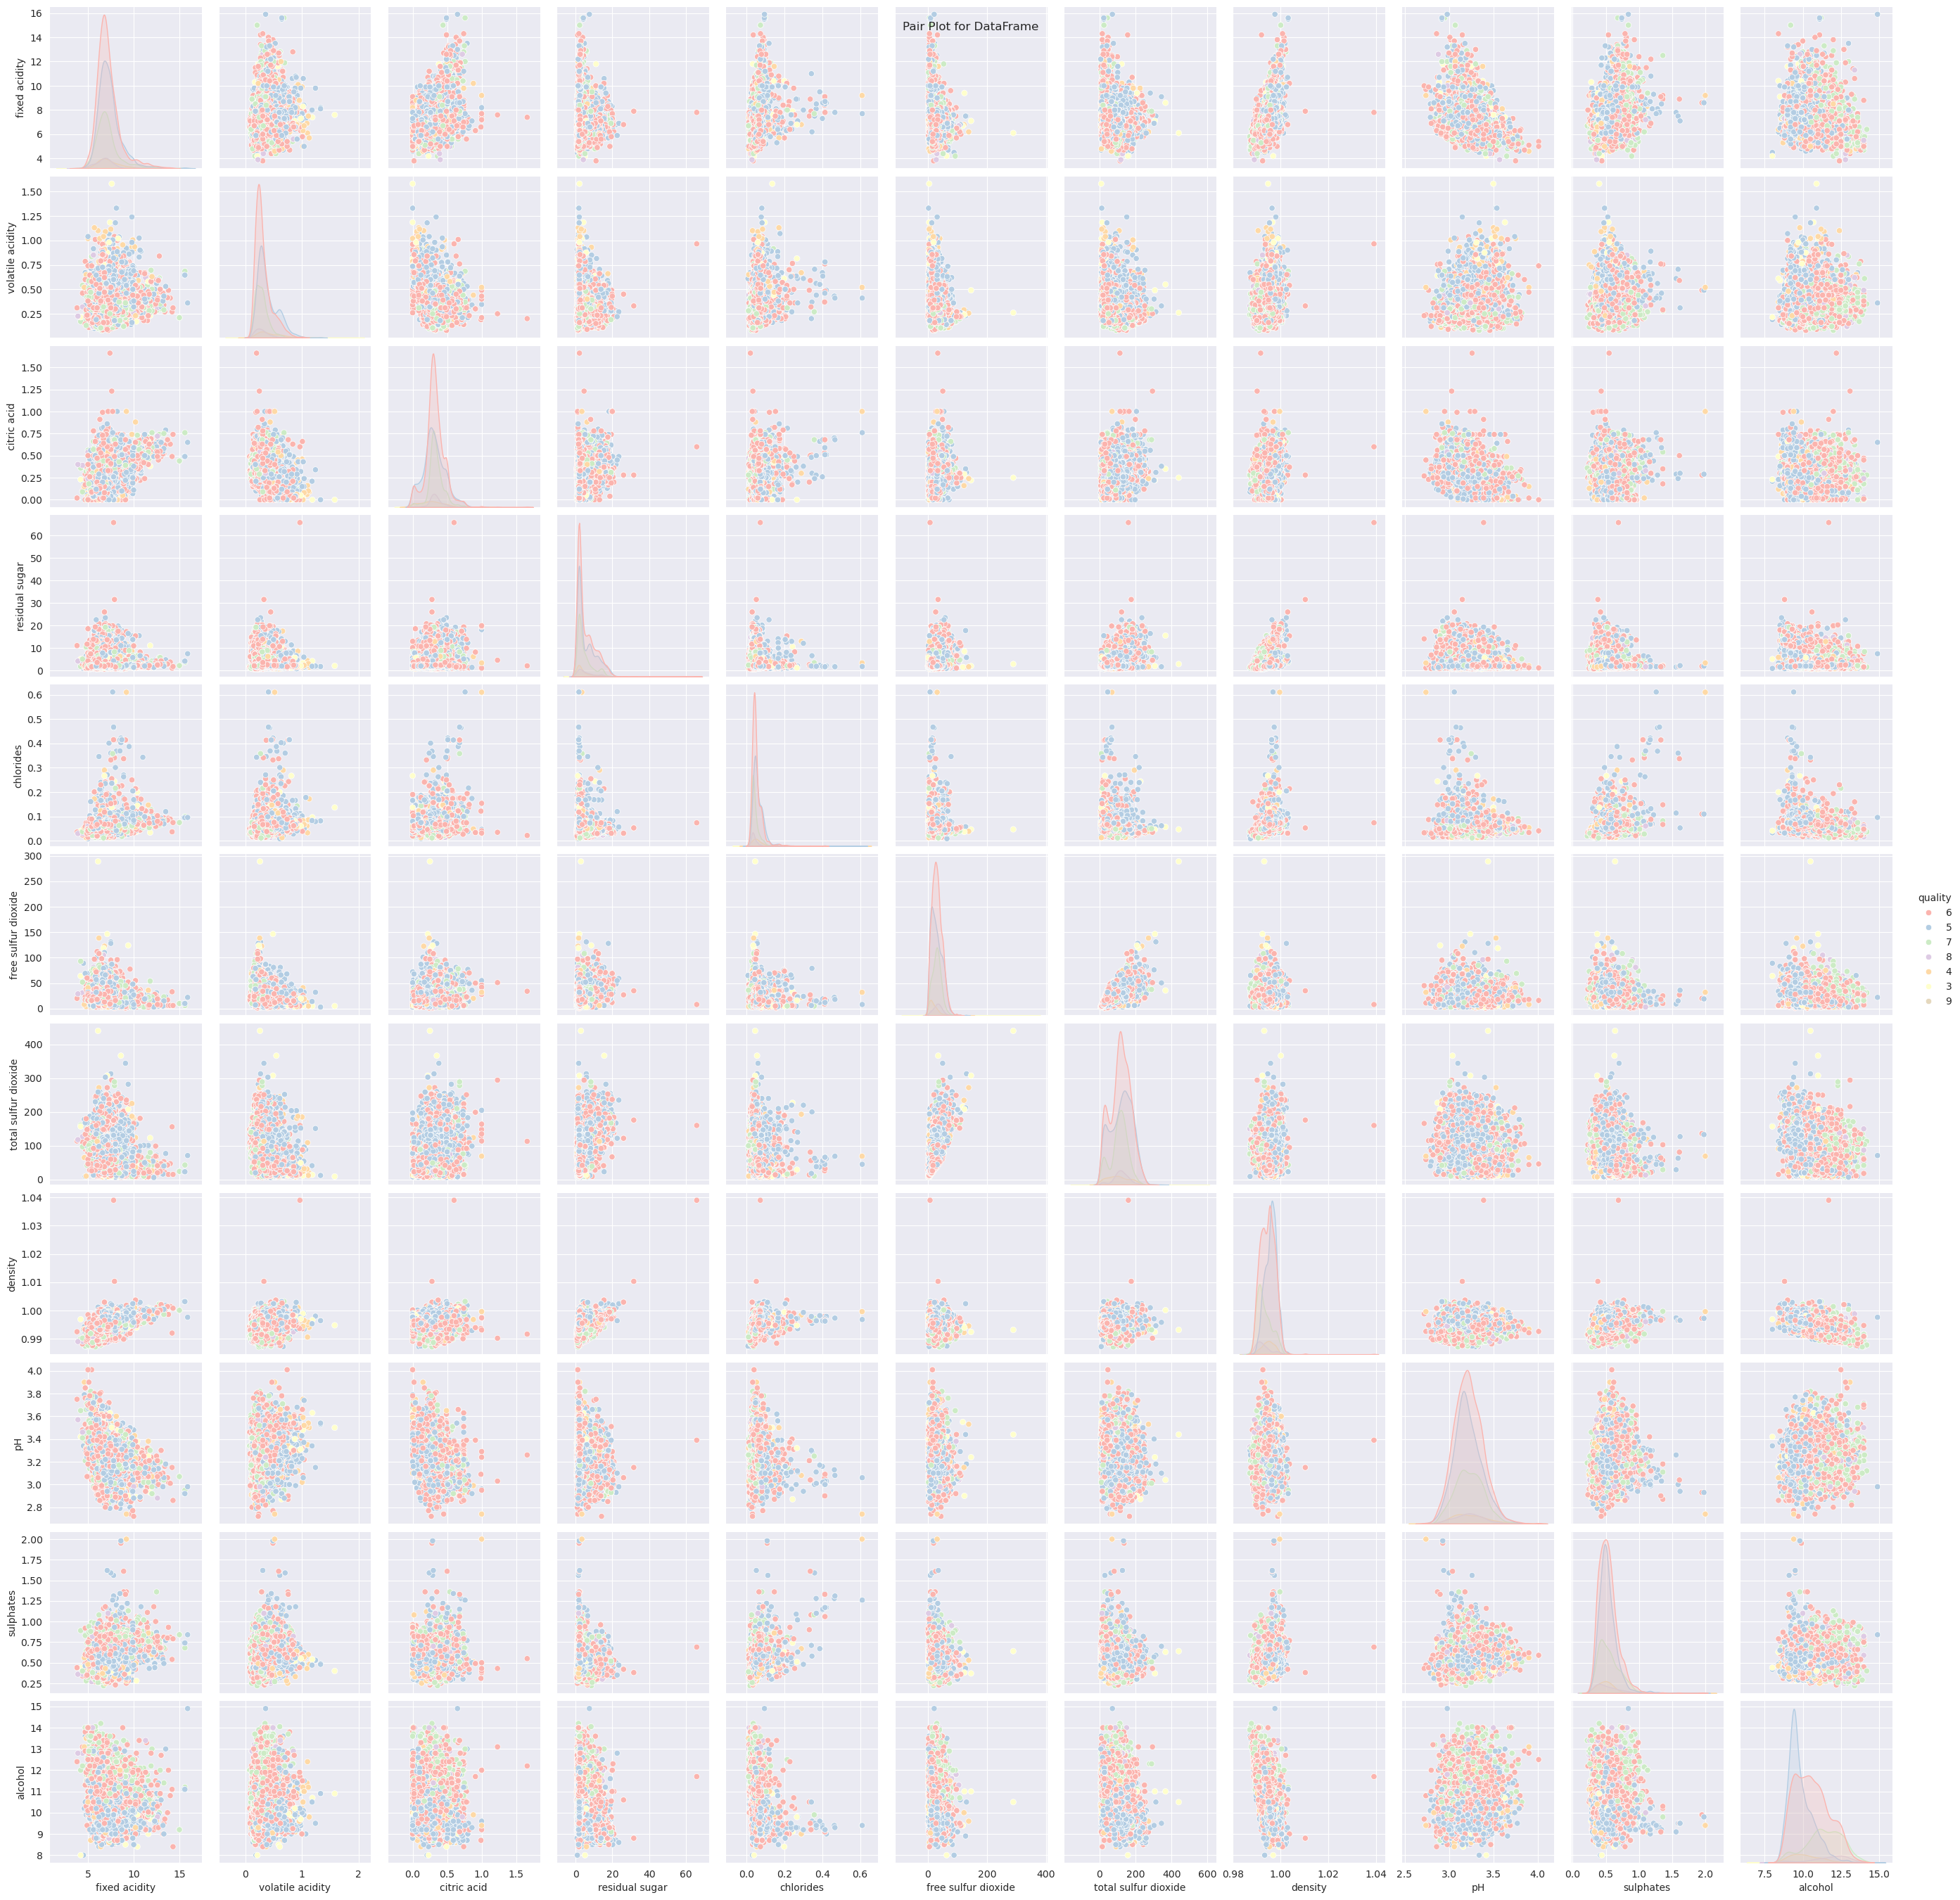

In [35]:
sns.set_palette("Pastel1")
plt.figure(figsize=(10, 6))
sns.pairplot(df,hue="quality")
plt.suptitle('Pair Plot for DataFrame')
plt.show()


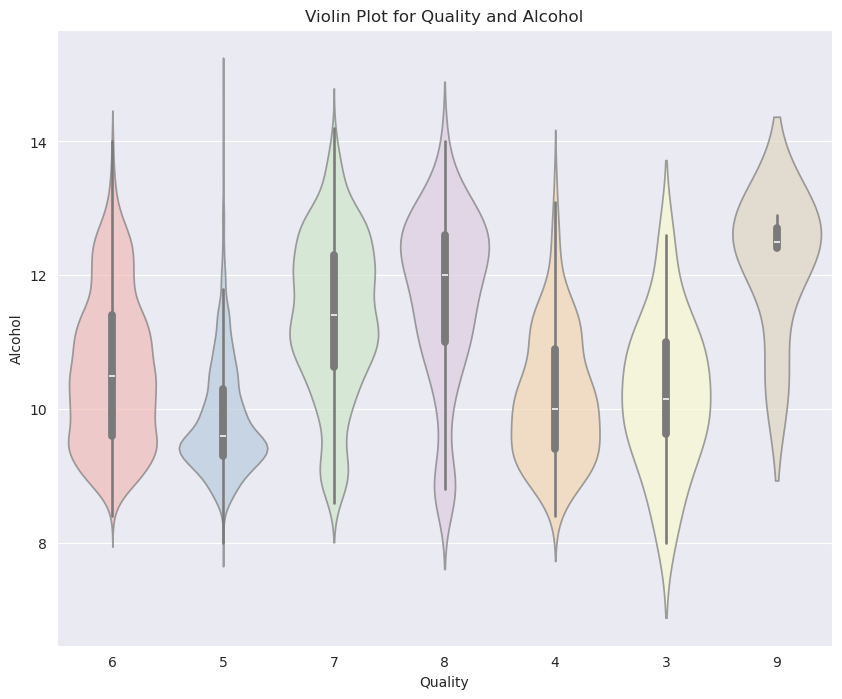

In [27]:
df['quality'] = df['quality'].astype(str)  
plt.figure(figsize=(10, 8))
sns.violinplot(x="quality", y="alcohol", data=df,  alpha=0.7, hue="quality")
plt.title('Violin Plot for Quality and Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()


<AxesSubplot: xlabel='quality', ylabel='alcohol'>

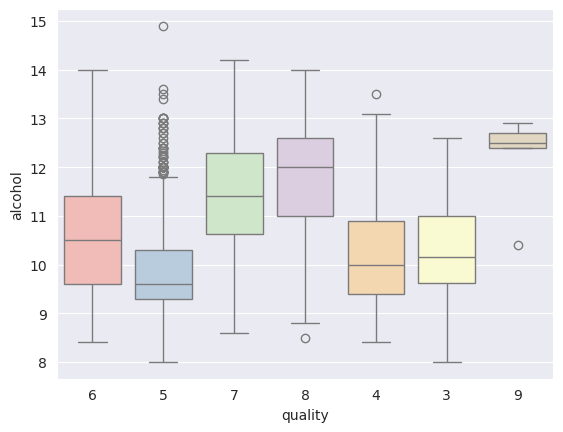

In [28]:
sns.boxplot(x='quality', y='alcohol', data=df, hue="quality")

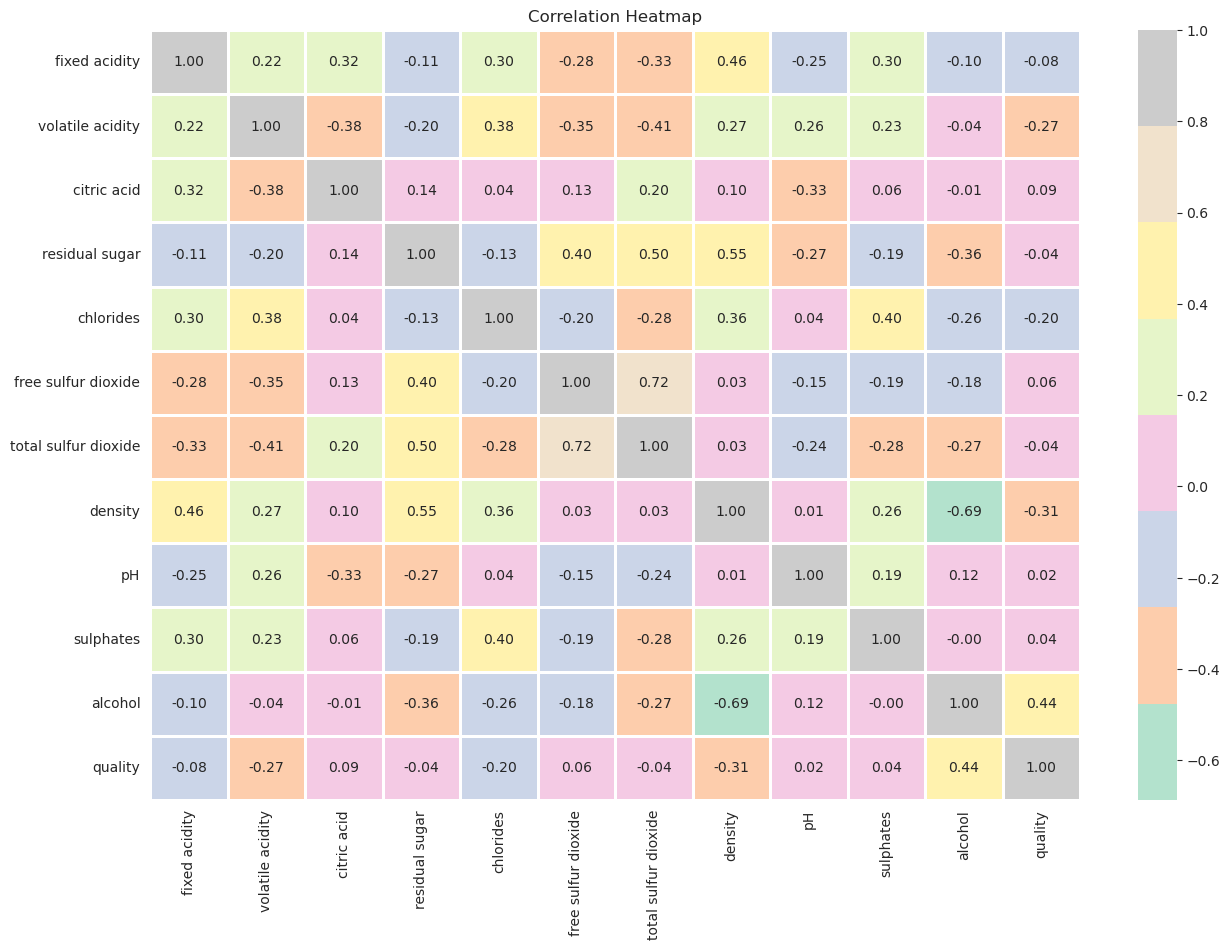

In [18]:
df1 = df.iloc[:, 1:]
plt.figure(figsize=(15, 10))
sns.heatmap(df1.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()
